<a href="https://colab.research.google.com/github/dafnep4/Dafne-Petrelli-s-coding/blob/main/final_Delhi_aqi_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all of the libraries
library(ggplot2)
library(boot)

In [ ]:
pd <- read.csv("delhi_aqi.csv") #importing the file

**b)i)** Describe what is contained in this dataset, in which format the information
 is stored and how many records there are.

In [ ]:
head(pd) #displays the first few rows of the data frame

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
2,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
3,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
4,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
5,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
6,2020-11-25 06:00:00,3898.62,28.39,117.90,40.05,101.09,437.25,511.79,42.05


In [ ]:
summary(pd) #provides statistical information about the data frame

     date                 co                no              no2        
 Length:18776       Min.   :  260.4   Min.   :  0.00   Min.   :  4.28  
 Class :character   1st Qu.: 1068.1   1st Qu.:  0.68   1st Qu.: 33.93  
 Mode  :character   Median : 1842.5   Median :  5.25   Median : 54.15  
                    Mean   : 2929.2   Mean   : 33.66   Mean   : 66.22  
                    3rd Qu.: 3685.0   3rd Qu.: 35.76   3rd Qu.: 83.63  
                    Max.   :21148.7   Max.   :500.68   Max.   :460.62  
       o3              so2             pm2_5              pm10        
 Min.   :  0.00   Min.   :  5.25   Min.   :  11.83   Min.   :  15.07  
 1st Qu.:  0.34   1st Qu.: 34.81   1st Qu.:  84.44   1st Qu.: 118.80  
 Median : 27.18   Median : 52.93   Median : 157.44   Median : 209.71  
 Mean   : 60.35   Mean   : 66.69   Mean   : 238.13   Mean   : 300.09  
 3rd Qu.: 92.98   3rd Qu.: 82.02   3rd Qu.: 313.00   3rd Qu.: 387.96  
 Max.   :801.09   Max.   :579.83   Max.   :1708.09   Max.   :1969.93  

In [ ]:
str(pd) #displays structure of the data frame

'data.frame':	18776 obs. of  9 variables:
 $ date : chr  "2020-11-25 01:00:00" "2020-11-25 02:00:00" "2020-11-25 03:00:00" "2020-11-25 04:00:00" ...
 $ co   : num  2617 3632 4539 4539 4379 ...
 $ no   : num  2.18 23.25 52.75 50.96 42.92 ...
 $ no2  : num  70.6 89.1 100.1 111 117.9 ...
 $ o3   : num  13.59 0.33 1.11 6.44 17.17 ...
 $ so2  : num  38.6 54.4 68.7 78.2 87.7 ...
 $ pm2_5: num  365 421 464 455 448 ...
 $ pm10 : num  412 486 542 534 529 ...
 $ nh3  : num  28.6 41 49.1 48.1 46.6 ...


In [ ]:
dim(pd) #provides the number of rows x columns that constitute the data frame

[1] 18776     9

In [ ]:
colnames(pd) #provides the names of the columns of the data frame

[1] "date"  "co"    "no"    "no2"   "o3"    "so2"   "pm2_5" "pm10"  "nh3"

**b)ii)** Comment on the presence (or not) of missing values and how these are affecting this dataset (if at all).


In [ ]:
any(is.na(pd)) #check if there is any missing values in the data set

[1] FALSE

*no missing values found in the data set*.

 b)iii) Create histograms of the numerical quantities recorded in the dataset


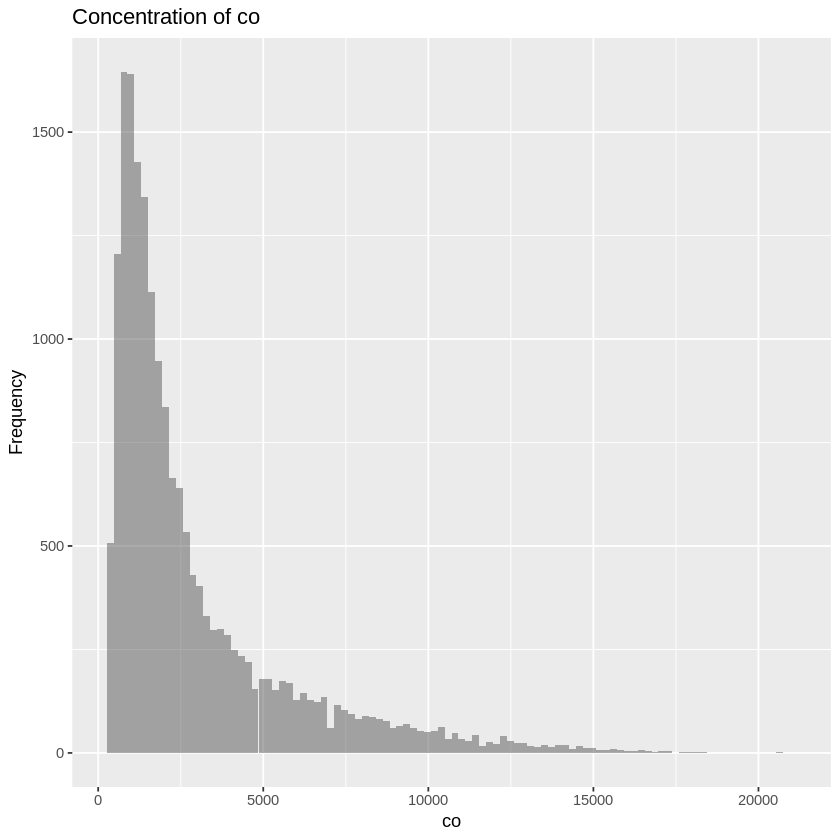

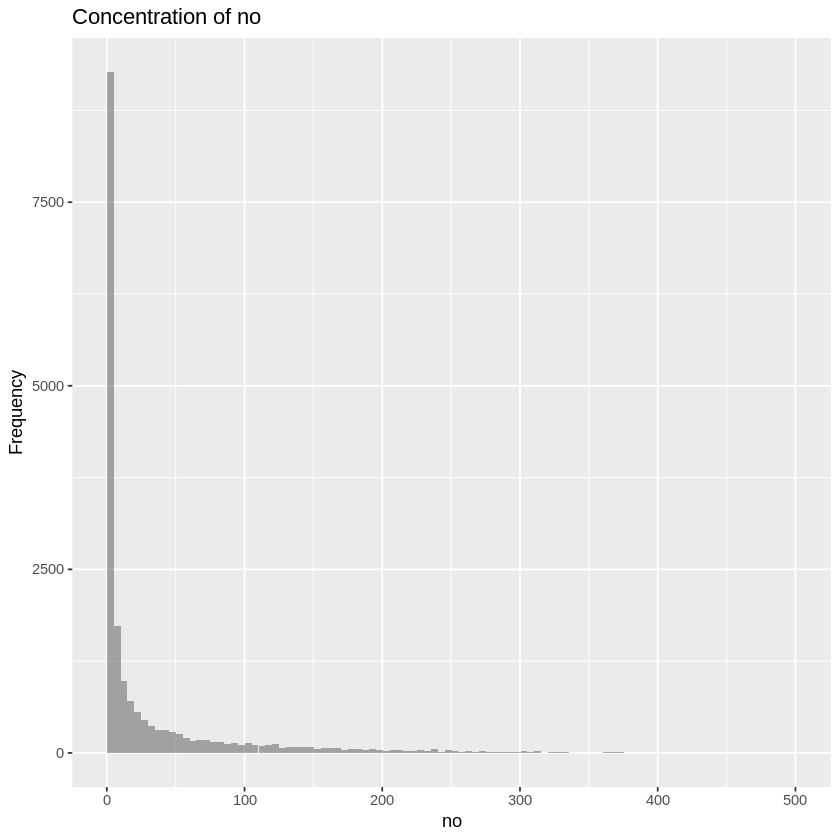

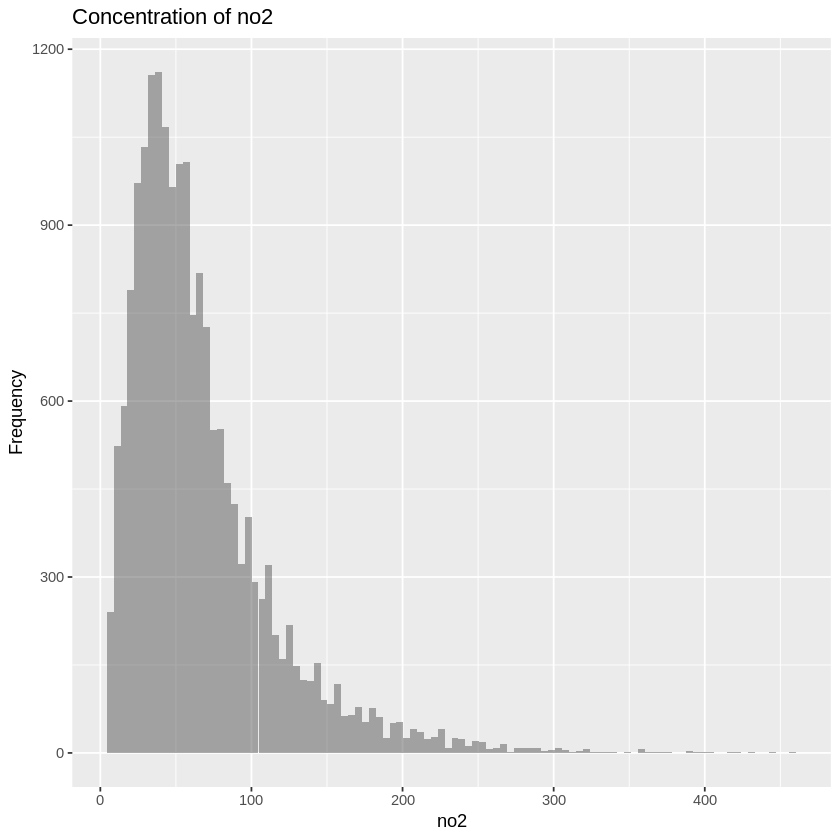

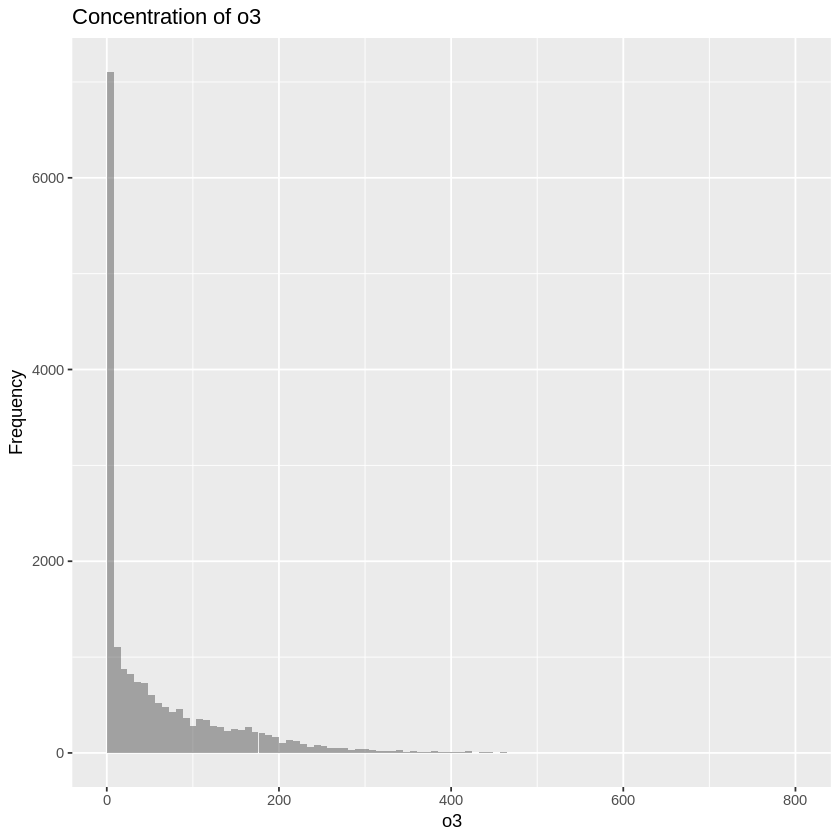

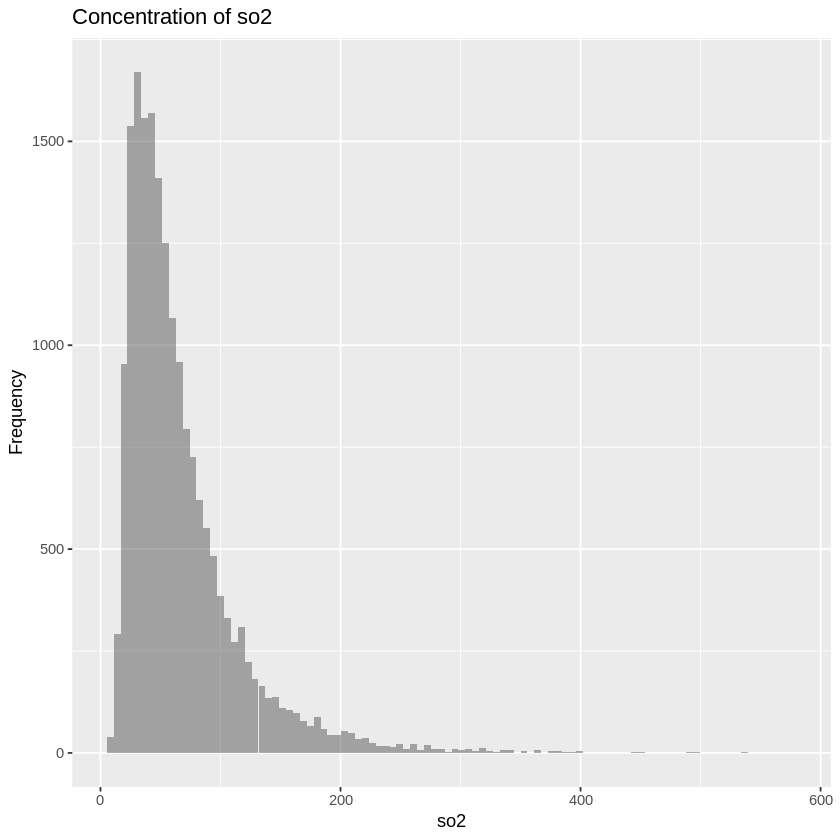

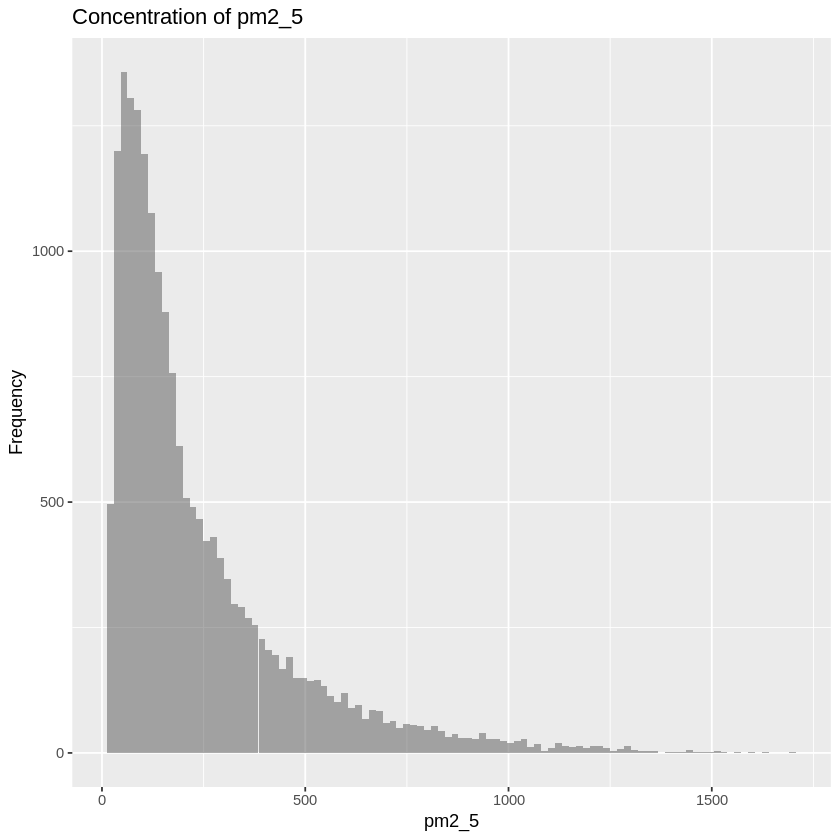

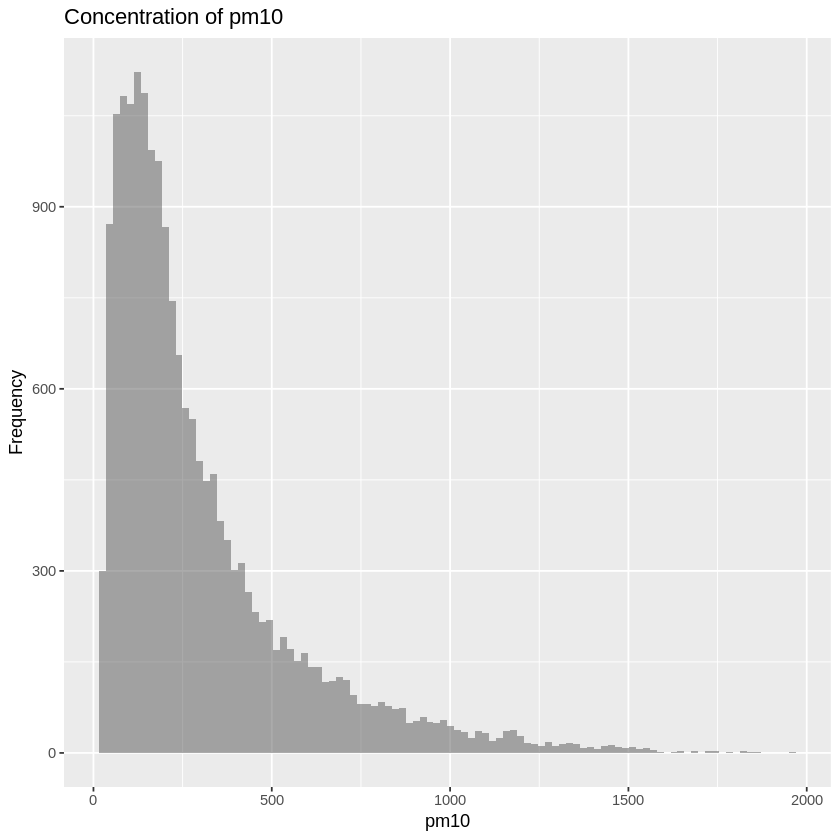

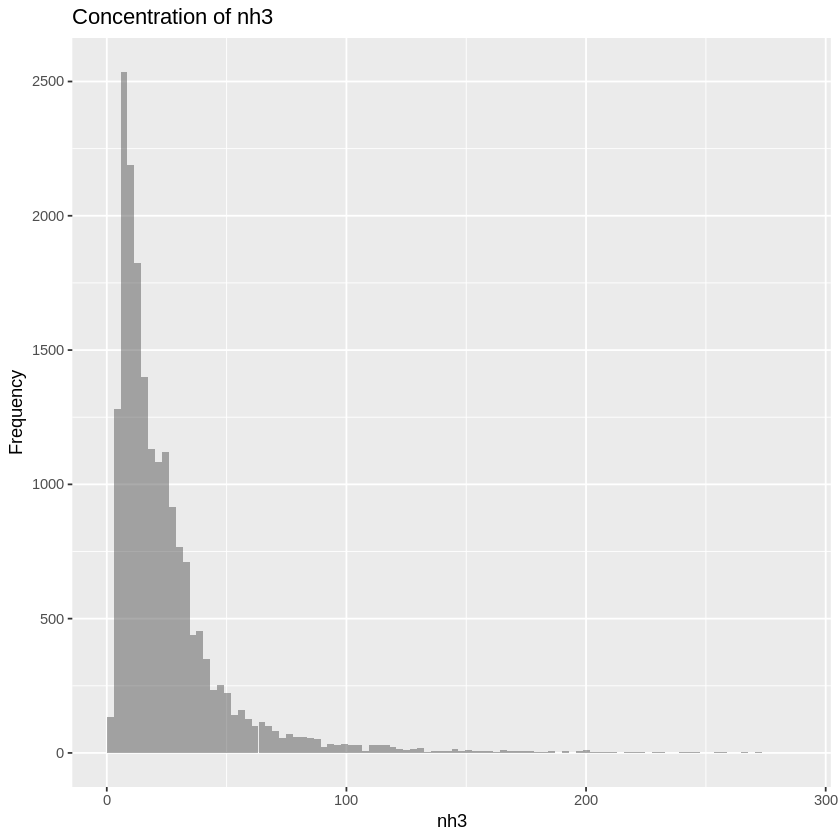

In [ ]:
columns<-names(pd)[sapply(pd,is.numeric)] #the sapply function extracts the numerical comulms belonging to the data frame

for (col in columns){ #initialized a for loop which itaretes for each collumn (pollutant) in the data frame
  breaks100 <- seq(from=min(pd[[col]]), to=max(pd[[col]]), length.out=101) #
  print(
    ggplot(pd, aes_string(x=col))+ #plotting the histogram, aes_string stores the column names as strings
      geom_histogram(breaks=breaks100, alpha=0.5)+ #breaks determines the binning
      ggtitle(paste("Concentration of",col))+ #assigning a title
      xlab(col)+ #assigning the x-axis
      ylab("Frequency") #assigning the y-axis
  )
}

 b)iv) Create boxplots of the numerical quantities recorded in the dataset:

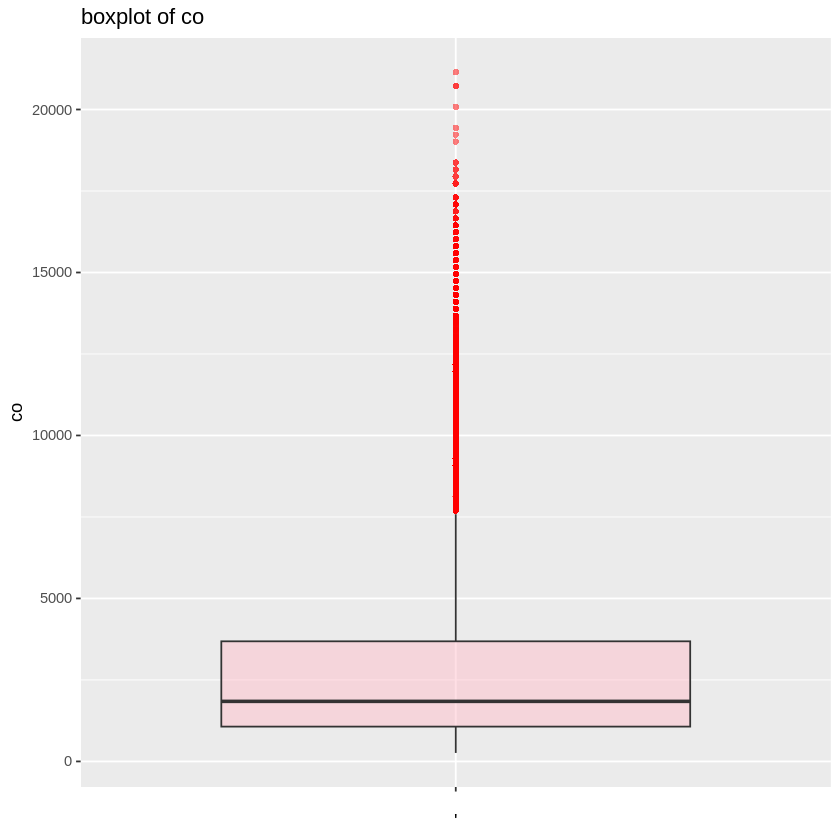

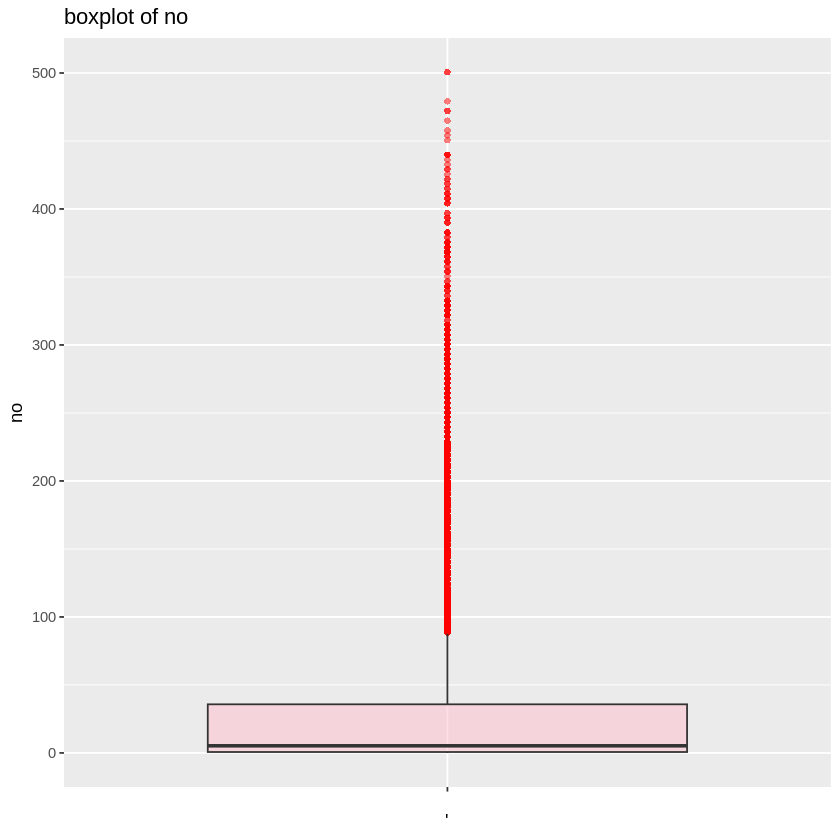

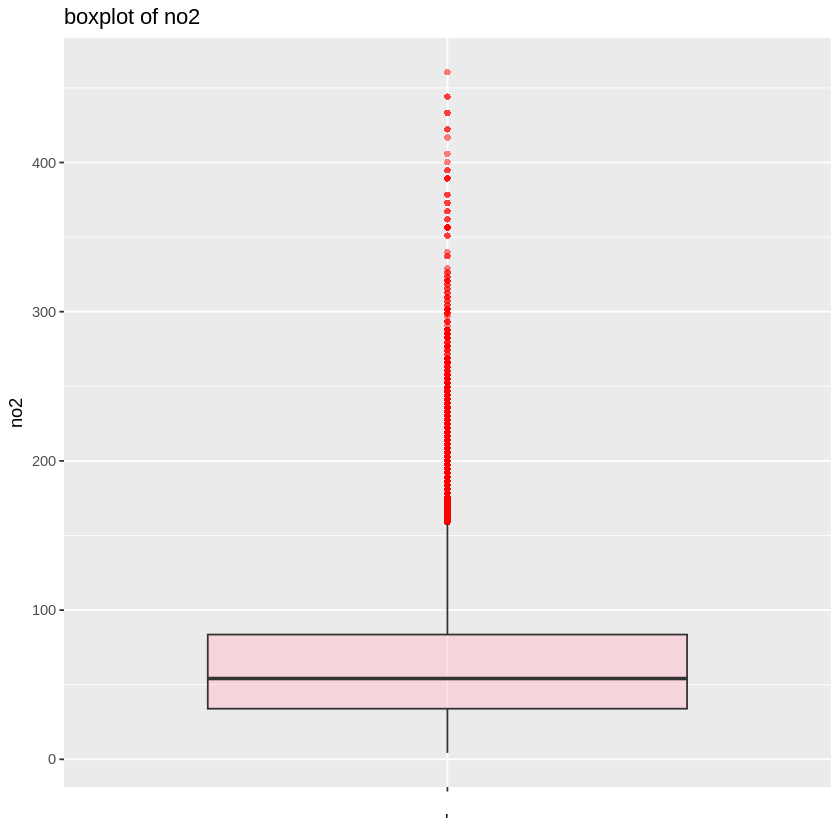

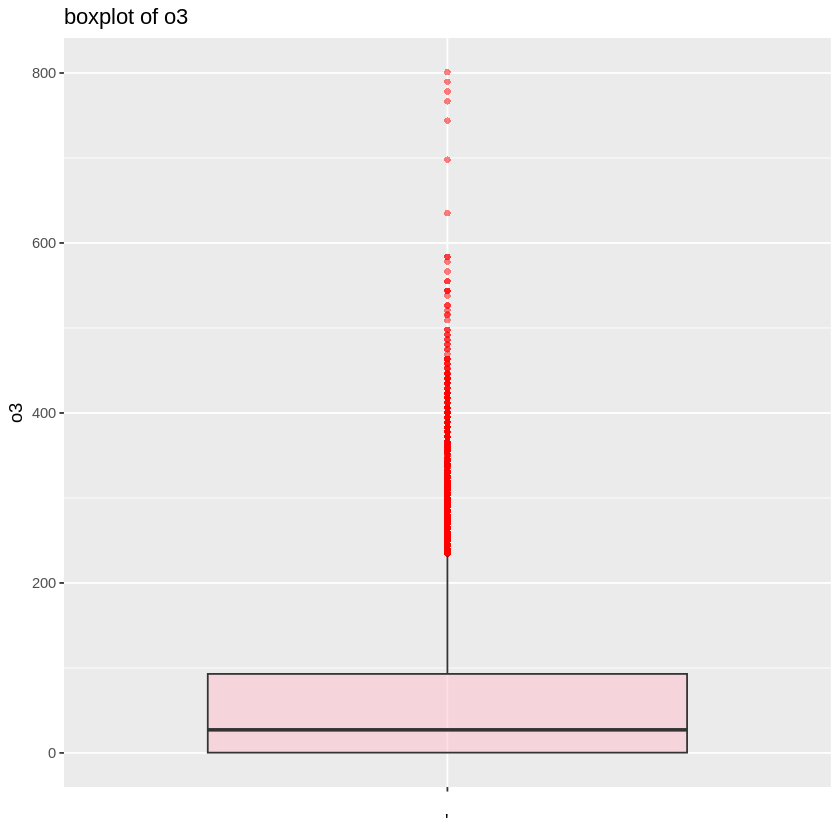

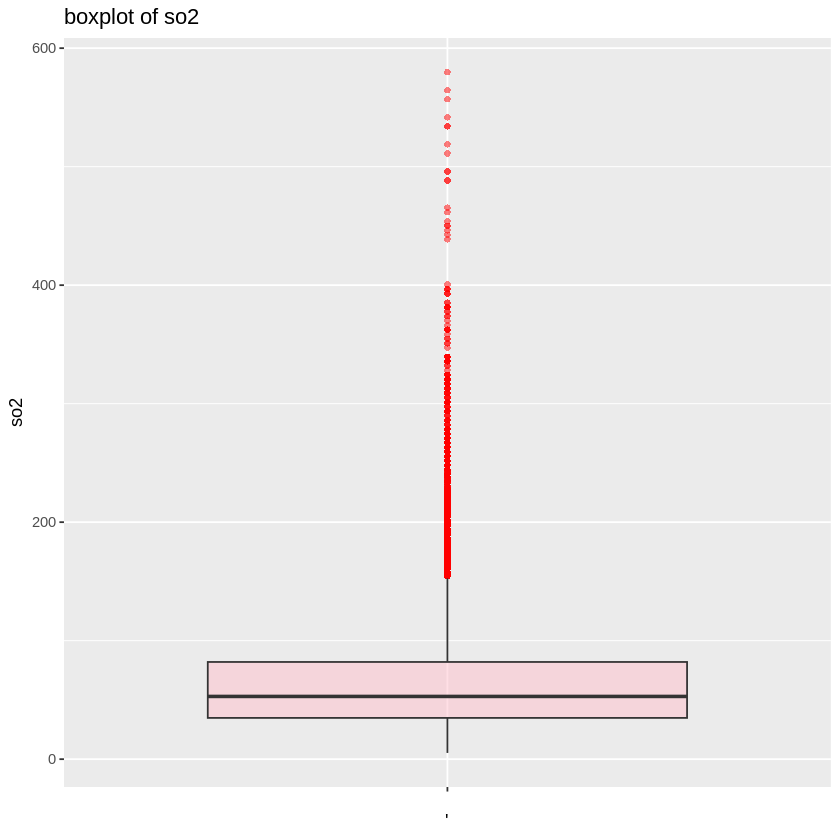

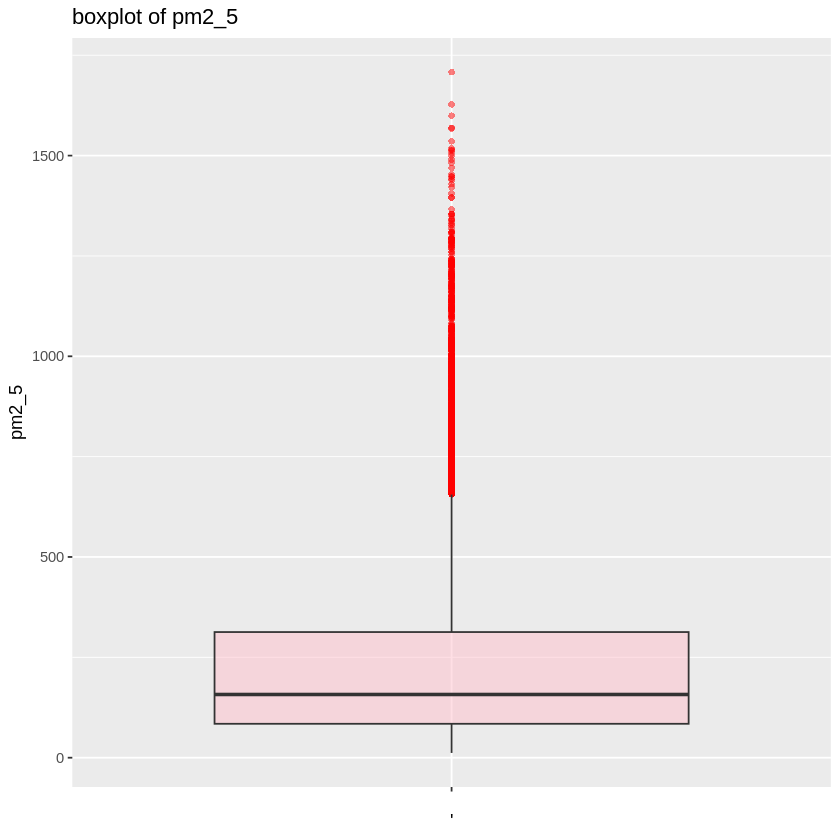

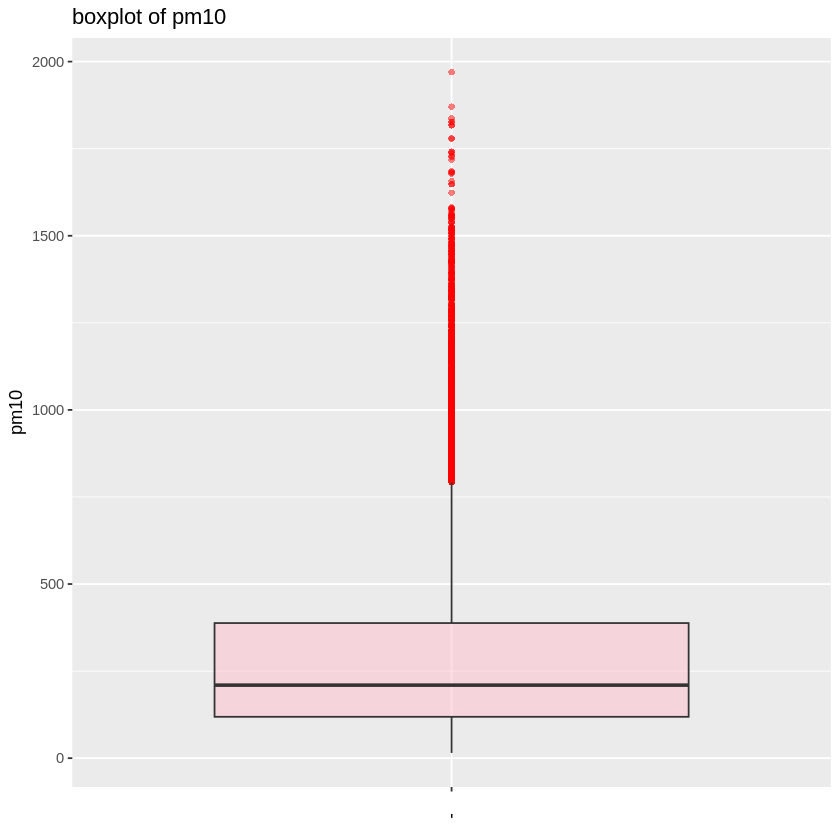

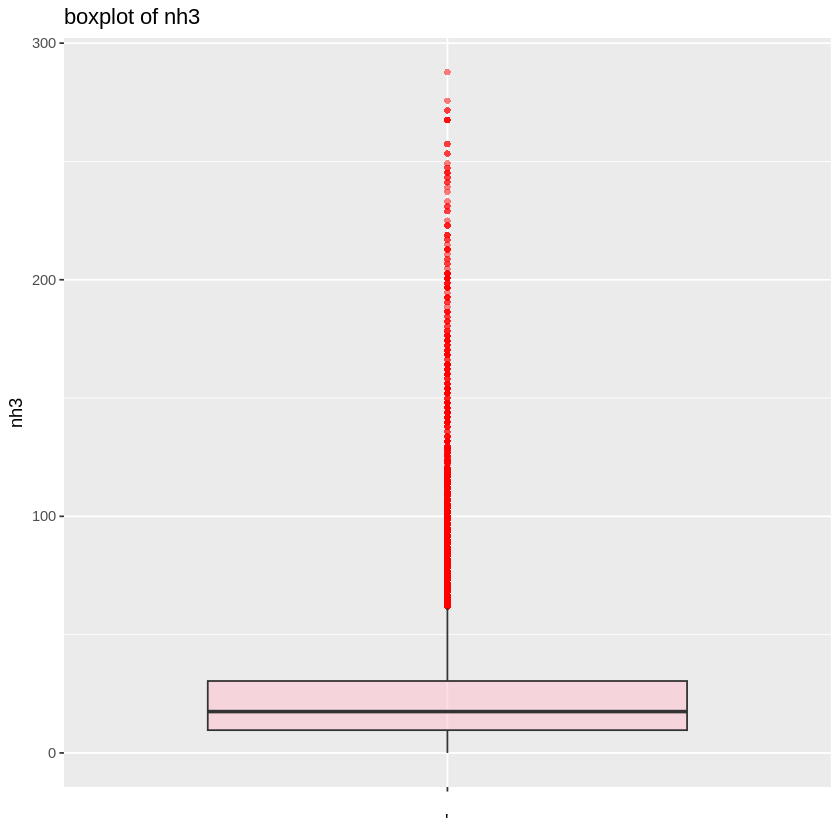

In [ ]:
for (col in columns) { #for loop to create a boxplot for each pollutant
  print(
    ggplot(pd, aes_string(x="''", y=col)) + #initialize the boxplot
      geom_boxplot(outlier.colour="red", outlier.shape=16, alpha=0.5, fill="pink") +
      labs(title = paste("boxplot of", col), x="'", y=col))
}

b)v) Calculate and visualise the correlations between the numerical variables with

In [ ]:
pearson<- cor(pd[columns], method="pearson") #using the corr function to calculate the pearson correlation coefficient which relates each pollutant concetration to one another
pearson

,co,no,no2,o3,so2,pm2_5,pm10,nh3
co,1.0000000,0.9141286,0.7642007,-0.4022842,0.5342267,0.9368297,0.9502183,0.7849508
no,0.9141286,1.0000000,0.5577118,-0.3549046,0.4987193,0.8164405,0.8299098,0.7243421
no2,0.7642007,0.5577118,1.0000000,-0.3436092,0.7103714,0.7018404,0.7119980,0.7183993
o3,-0.4022842,-0.3549046,-0.3436092,1.0000000,0.0132044,-0.2866606,-0.2948250,-0.2759834
so2,0.5342267,0.4987193,0.7103714,0.0132044,1.0000000,0.4884759,0.4918886,0.6284445
pm2_5,0.9368297,0.8164405,0.7018404,-0.2866606,0.4884759,1.0000000,0.9892910,0.6444463
pm10,0.9502183,0.8299098,0.7119980,-0.2948250,0.4918886,0.9892910,1.0000000,0.6860808
nh3,0.7849508,0.7243421,0.7183993,-0.2759834,0.6284445,0.6444463,0.6860808,1.0000000


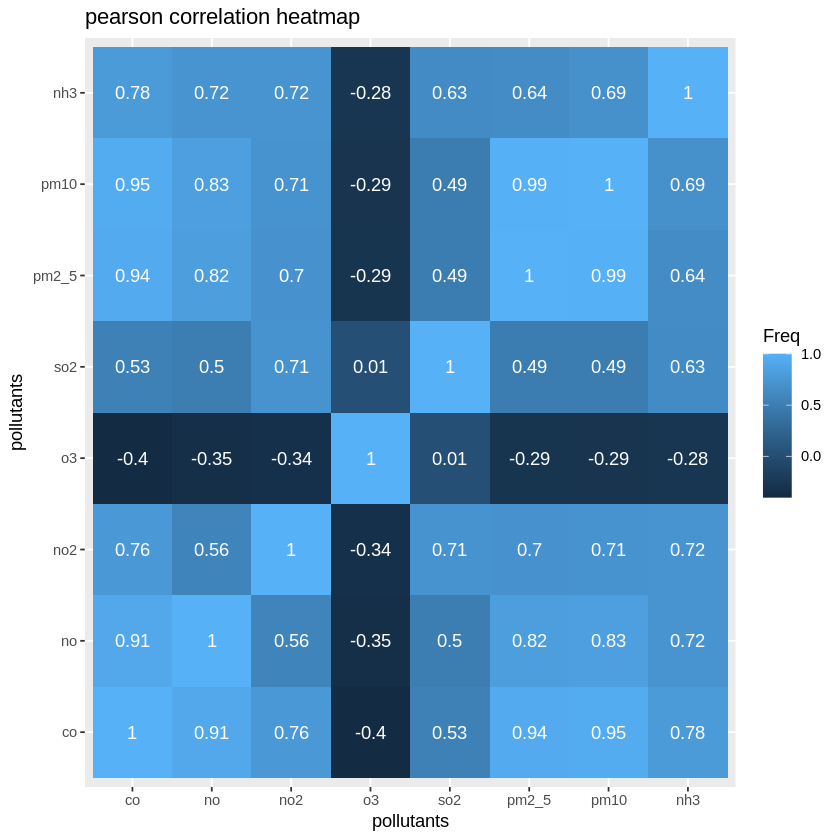

In [ ]:
cor_df <- as.data.frame(as.table(pearson)) #converting pearson coefficient into a data frame

ggplot(cor_df, aes(Var1, Var2, fill = Freq)) + #var 1 and var 2 represent the two pollutants for which the pollution is computed for
  geom_tile() + #initialize heat map
  geom_text(aes(label=round(Freq, 2)), color="white") +
  labs(title="pearson correlation heatmap", x="pollutants", y="pollutants")

 b)vi) Produce a table of the main metrics for the numerical variables

In [ ]:
mode <- function(v) { #computing the mode, since it is not included when printing the data set's statistics
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}


statistics <- data.frame( #grouping all of the statistics together
  Variable = columns,
  Mean = sapply(pd[, -1], mean),
  Median = sapply(pd[, -1], median,),

  Std_Dev = sapply(pd[, -1], sd),
  Mode = sapply(pd[, -1], mode),
  IQR = sapply(pd[, -1], IQR,),
  Q1 = sapply(pd[, -1], function(x) quantile(x, 0.25, na.rm=TRUE)),
  Q3 = sapply(pd[, -1], function(x) quantile(x, 0.75, na.rm=TRUE))
)

# Print summary statistics
print(statistics)

      Variable       Mean   Median    Std_Dev    Mode       IQR        Q1
co          co 2929.22863 1842.500 2854.52351 1895.90 2616.8800 1068.1200
no          no   33.66070    5.250   62.12712    0.00   35.0800    0.6800
no2        no2   66.22130   54.150   48.52749   45.93   49.7000   33.9300
o3          o3   60.34624   27.180   80.46493    0.00   92.6400    0.3400
so2        so2   66.69363   52.930   49.43919   62.94   47.2100   34.8100
pm2_5    pm2_5  238.13031  157.445  226.53363   98.81  228.5600   84.4400
pm10      pm10  300.09297  209.705  267.16583  176.21  269.1675  118.7975
nh3        nh3   25.10982   17.480   26.40211    8.61   20.7700    9.6300
            Q3
co    3685.000
no      35.760
no2     83.630
o3      92.980
so2     82.020
pm2_5  313.000
pm10   387.965
nh3     30.400


c) Choose one of the numerical variables





*MEAN*

c)i) For each statistic considered, plot its distribution from the bootstrap and the QQplot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = pd[["co"]], statistic = stat_fun_mean, R = 1000)


Bootstrap Statistics :
    original   bias    std. error
t1* 2929.229 0.930204    21.15931

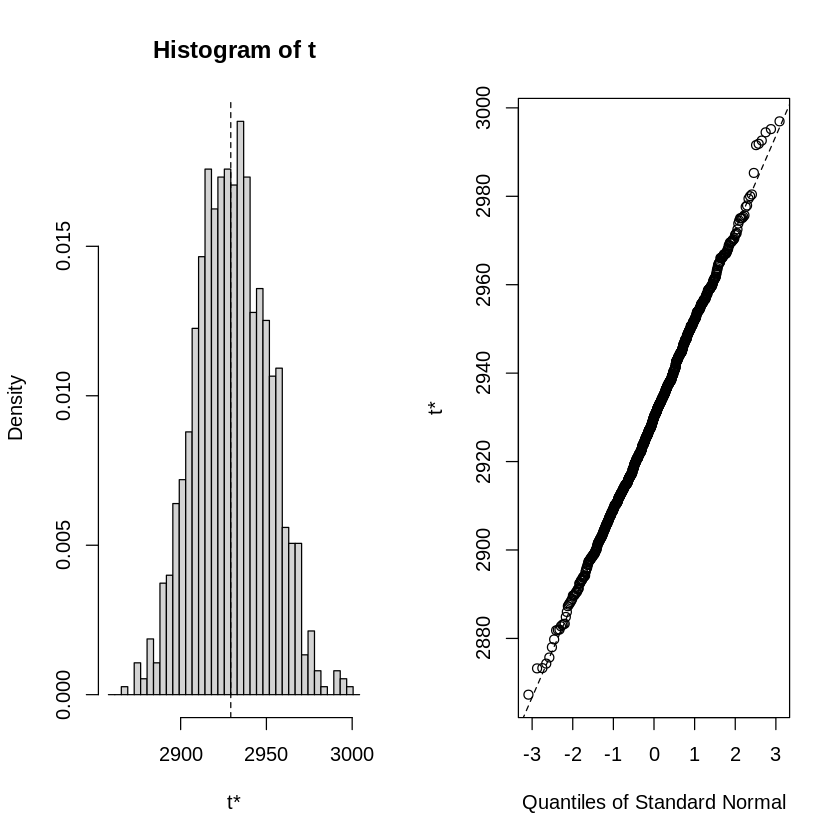

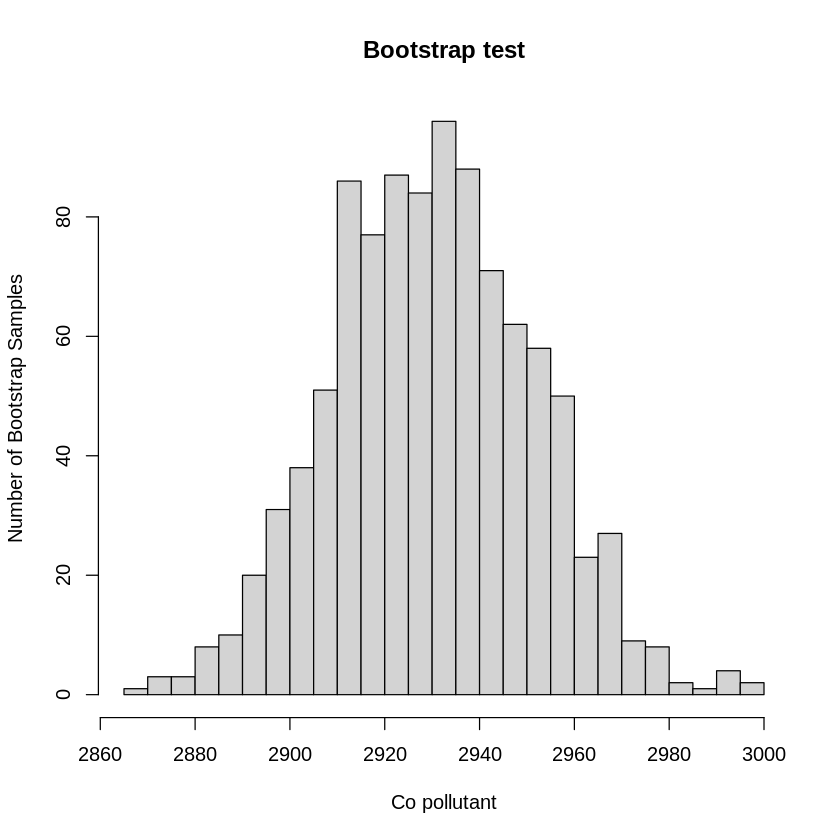

In [ ]:
stat_fun_mean <- function(x, idx) mean(x[idx]) #computing the mean of the pollutant
boot_obj_mean <- boot(pd[['co']], R=1000, statistic=stat_fun_mean) #computing the bootstrap mean for a 1000 times
boot_obj_mean
plot(boot_obj_mean)
hist(boot_obj_mean$t, breaks=40, xlab = "Co pollutant", ylab = "Number of Bootstrap Samples", main = "Bootstrap test")

c)ii) Calculate the Confidence Intervals at 68% and 95%

In [ ]:
#calculated confidence interval at 68%
CI_68 <- boot.ci(boot_obj_mean,conf = 0.68,type=c("norm","basic","perc"))
CI_68

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_obj_mean, conf = 0.68, type = c("norm", 
    "basic", "perc"))

Intervals : 
Level      Normal              Basic              Percentile     
68%   (2907, 2949 )   (2906, 2949 )   (2909, 2952 )  
Calculations and Intervals on Original Scale

In [ ]:
#calculated confidence interval at 95%
CI_95 <- boot.ci(boot_obj_mean,conf = 0.95,type=c("norm","basic","perc"))
CI_95

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_obj_mean, conf = 0.95, type = c("norm", 
    "basic", "perc"))

Intervals : 
Level      Normal              Basic              Percentile     
95%   (2887, 2970 )   (2888, 2969 )   (2890, 2970 )  
Calculations and Intervals on Original Scale

c)iii) Compare the Confidence Intervals obtained to the ones calculated with the Student’s t-distribution;

In [ ]:
#calculated the confidence interval via the Student's t-distribution
t_stats_95 <- qt(c(.025, .975), df=length(pd[['co']]))
t_stats_68 <- qt(c(.16, .84), df=length(pd[['co']]))

err_68 <- qt(c(.16, .84), df=length(pd[['co']]))[2]*sd(pd[['co']])/sqrt(length(pd[['co']]))
mean(pd[['co']])-err_68
mean(pd[['co']])+err_68

err_95 <- qt(c(.025, .975), df=length(pd[['co']]))[2]*sd(pd[['co']])/sqrt(length(pd[['co']]))
mean(pd[['co']])-err_95
mean(pd[['co']])+err_95

[1] 2908.511

[1] 2949.946

[1] 2888.396

[1] 2970.061

c)iv) Draw the lines corresponding to the 95% confidence interval on the statistic distribution.

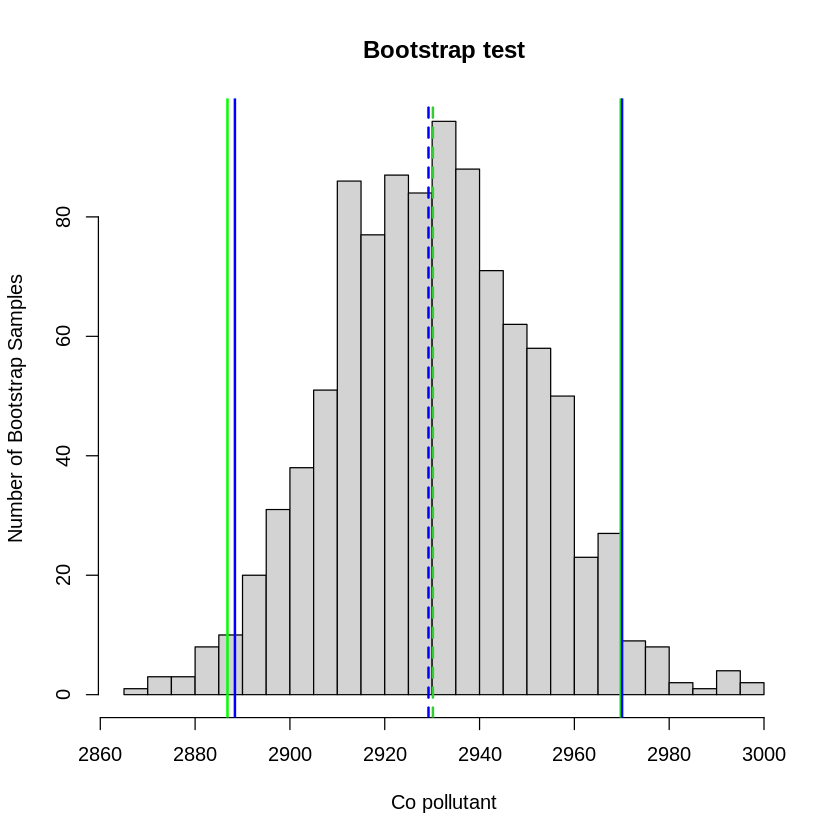

In [ ]:
#plotted the bootstrap test histogram to compare the confidence intervals computed from the bootstraping and the ones from the t-test, the actual mean and the bootstrapped mean
hist(boot_obj_mean$t, breaks=40, xlab = "Co pollutant", ylab = "Number of Bootstrap Samples", main = "Bootstrap test")
abline(v=CI_95$normal, col="green",lwd=2)
abline(v=mean(boot_obj_mean$t), col="lime green",lwd=2,lty=2)
abline(v=mean(pd[['co']])-err_95, col="blue",lwd=2)
abline(v=mean(pd[['co']])+err_95, col="blue",lwd=2)
abline(v=mean(pd[['co']]), col="blue",lwd=2,lty=2)

*STANDARD DEVIATION*


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = pd[["co"]], statistic = stat_fun_sd, R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1* 2854.524 -0.8411002    26.08212

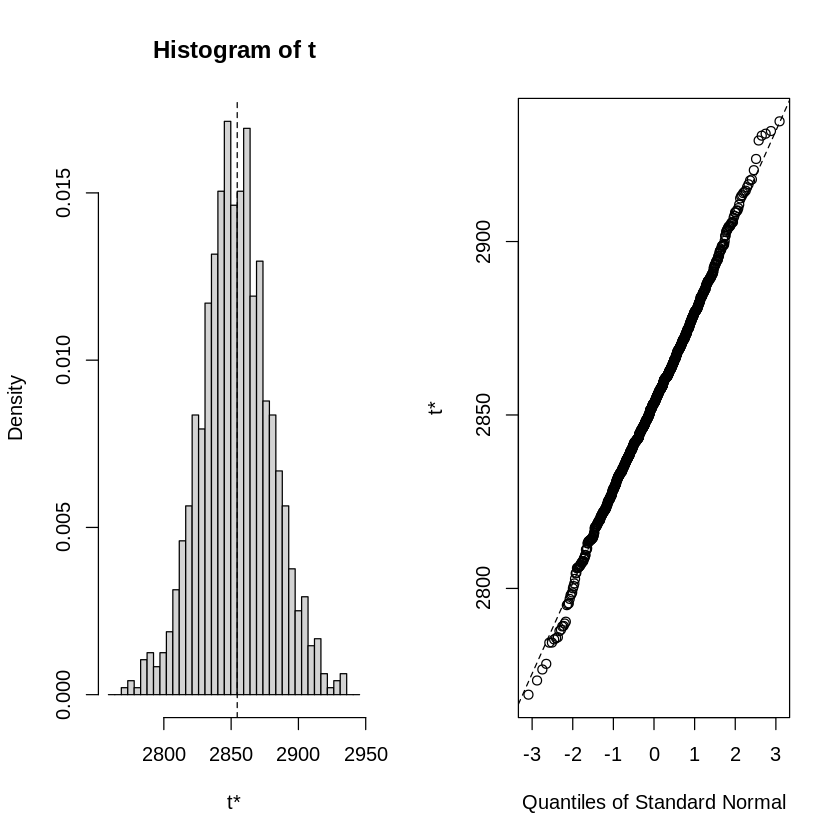

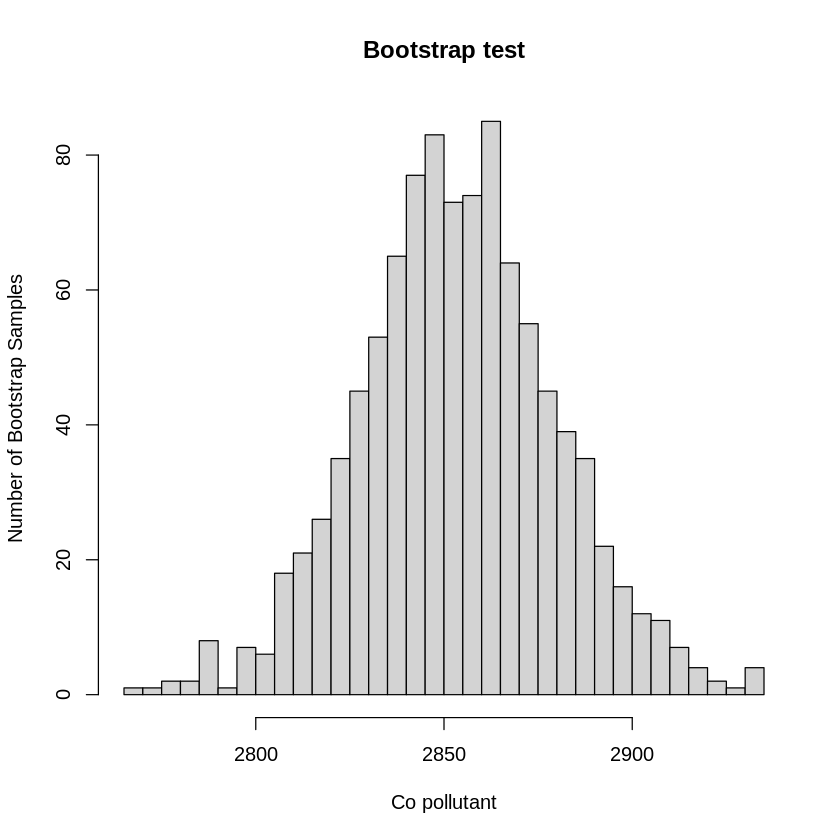

In [ ]:
stat_fun_sd <- function(x, idx) sd(x[idx])
boot_obj_sd <- boot(pd[['co']], R=1000, statistic=stat_fun_sd)
boot_obj_sd
plot(boot_obj_sd)
hist(boot_obj_sd$t, breaks=40, xlab = "Co pollutant", ylab = "Number of Bootstrap Samples", main = "Bootstrap test")

In [ ]:
#calculated confidence interval at 68%
CI_68 <- boot.ci(boot_obj_sd,conf = 0.68,type=c("norm","basic","perc"))
CI_68

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_obj_sd, conf = 0.68, type = c("norm", 
    "basic", "perc"))

Intervals : 
Level      Normal              Basic              Percentile     
68%   (2829, 2881 )   (2830, 2880 )   (2829, 2879 )  
Calculations and Intervals on Original Scale

In [ ]:
#calculated confidence interval at 95%
CI_95 <- boot.ci(boot_obj_sd,conf = 0.95,type=c("norm","basic","perc"))
CI_95

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_obj_sd, conf = 0.95, type = c("norm", 
    "basic", "perc"))

Intervals : 
Level      Normal              Basic              Percentile     
95%   (2804, 2906 )   (2802, 2908 )   (2801, 2907 )  
Calculations and Intervals on Original Scale

In [ ]:
chi_sq_95 <- qchisq(c(.975, .025), df = length(pd[['co']]) - 1) #calculated the confidence interval via the Student's t-distribution
chi_sq_68 <- qchisq(c(.84, .16), df = length(pd[['co']]) - 1)

s <- sd(pd[['co']])  #sample standard deviation
n <- length(pd[['co']])

err_68_low <- sqrt((n-1) * s^2 / chi_sq_68[1]) #formula to compute the confidence intervals
err_68_high <- sqrt((n-1) * s^2 / chi_sq_68[2])

err_95_low <- sqrt((n-1) * s^2 / chi_sq_95[1])
err_95_high <- sqrt((n-1) * s^2 / chi_sq_95[2])

err_68_low
err_68_high

err_95_low
err_95_high


[1] 2839.987

[1] 2869.287

[1] 2825.943

[1] 2883.692

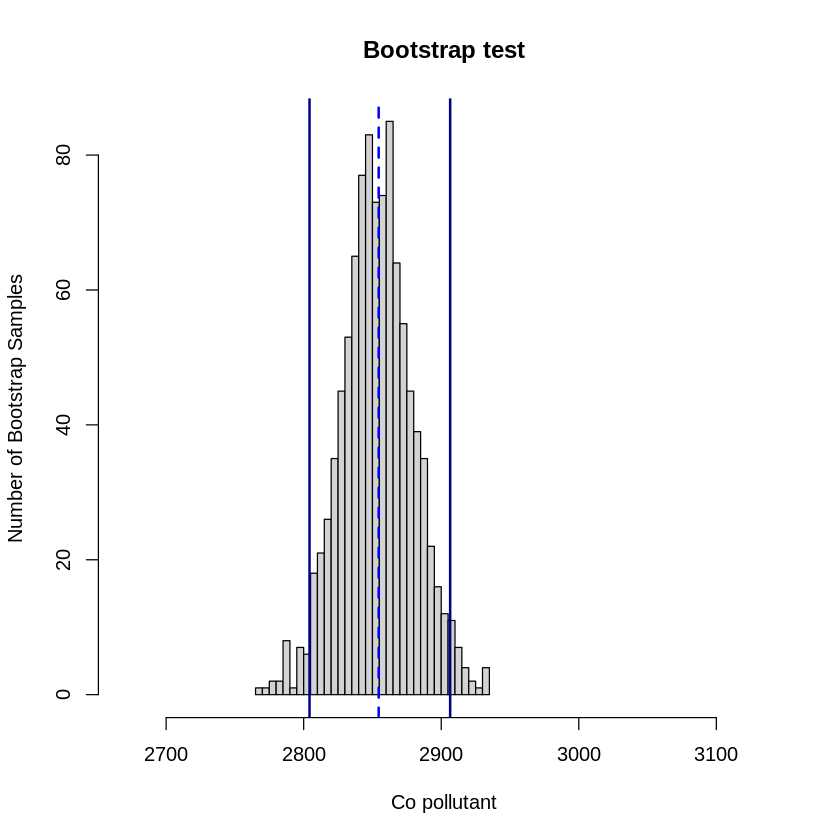

In [ ]:
#plotted the bootstrap test histogram to compare the confidence intervals computed from the bootstraping and the ones from the t-test, the actual standard deviation and the bootstrapped standard devoation
hist(boot_obj_sd$t, breaks=40,xlim=c(min(boot_obj_sd$t) - 100, max(boot_obj_sd$t) + 200), xlab = "Co pollutant", ylab = "Number of Bootstrap Samples", main = "Bootstrap test")
abline(v=CI_95$normal, col="dark blue",lwd=2)
abline(v=sd(boot_obj_sd$t), col="green",lty=2)
abline(v=sd(pd[['co']])-err_95_low, col="green",lwd=2)
abline(v=sd(pd[['co']])+err_95_high, col="green",lwd=2)
abline(v=sd(pd[['co']]), col="blue",lwd=2,lty=2)